In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**About Yulu**

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Problem Statement**

The company wants to know:

*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

*   How well those variables describe the electric cycle demands

**Dataset:**

Dataset Link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

**Column Profiling:**

*   datetime: datetime

*   season: season (1: spring, 2: summer, 3: fall, 4: winter)

*   holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*   temp: temperature in Celsius

*   atemp: feeling temperature in Celsius

*   humidity: humidity

*   windspeed: wind speed

*   casual: count of casual users

*   registered: count of registered users

*   count: count of total rental bikes including both casual and registered



In [ ]:
# Function for removing outliers after detection

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outlier_fraction = (len(df_in)-len(df_out))/len(df_in)
    if outlier_fraction > 0.0:
        fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,6))
        sns.boxplot(data=df_in, y=col_name)
        if outlier_fraction <= 0.10:
            fig.suptitle(f"Outliers constitute {round(outlier_fraction*100, 2)}% of data for column '{col_name}'. Hence removing outliers.", fontsize=20, color="green")
            plt.show()
            return df_out
        else:
            fig.suptitle(f"Outliers constitute significant amount of data ({round(outlier_fraction*100, 2)}%) for column '{col_name}'. Hence not removing outliers..", fontsize=20, color="green")
            plt.show()
            return df_in
    else:
        return df_in

# 1 **Getting brief of data**


## 1.1 Importing Libraries and fetching data into Dataframe

In [ ]:
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import io
warnings.filterwarnings('ignore')

In [ ]:
csv_path = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(csv_path, delimiter=",")

## 1.2 **Inspecting First Few Rows of the DataFrame**

In [ ]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
# Number of rows amd columns in dataset
print(f"# Number of Rows: {df.shape[0]} \n# Number of Columns: {df.shape[1]}")

# Number of Rows: 10886 
# Number of Columns: 12


**10886** Records of bike Rented (each record shows howmany bikes were rented during that hour of the day.)

## 1.3 Data type and Non-NULL values

**Let's look at the datatype and the number of non-null values in the Yulu dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 1.4 Type conversion

Datatype of following attributes needs to changed to proper data type
- **datetime** - to datetime
- **season** - to categorical
- **holiday** - to categorical
- **workingday** - to categorical
- **weather** - to categorical

In [ ]:

df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [ ]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


## 1.5 Detecting missing values in the dataset

In [ ]:

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- There are no missing values in the dataset.
- **casual** and **registered** attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

## 1.6 **Data Mapping of Categorical Variables**

- **season** - to categorical
- **holiday** - to categorical
- **workingday** - to categorical
- **weather** - to categorical

Also seggregating datetime values into day, date, hour, month, month name and year

In [ ]:
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df["season"] = df["season"].map(lambda x: season_mapping[x])

holiday_mapping = {0:'no', 1:'yes'}
df["holiday"] = df["holiday"].map(lambda x: holiday_mapping[x])

working_day_mapping = {0:'no', 1:'yes'}
df["workingday"] = df["workingday"].map(lambda x: working_day_mapping[x])

weather_mapping = {1:'clear', 2:'partly_clear', 3:'rain', 4:'intense'}
df["weather"] = df["weather"].map(lambda x: weather_mapping[x])

df["day"]=df["datetime"].dt.day_name()
df["date"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month
df["month_name"] = df["datetime"].dt.month_name()
df["year"] = df["datetime"].dt.year

## 1.7 **Missing Number**

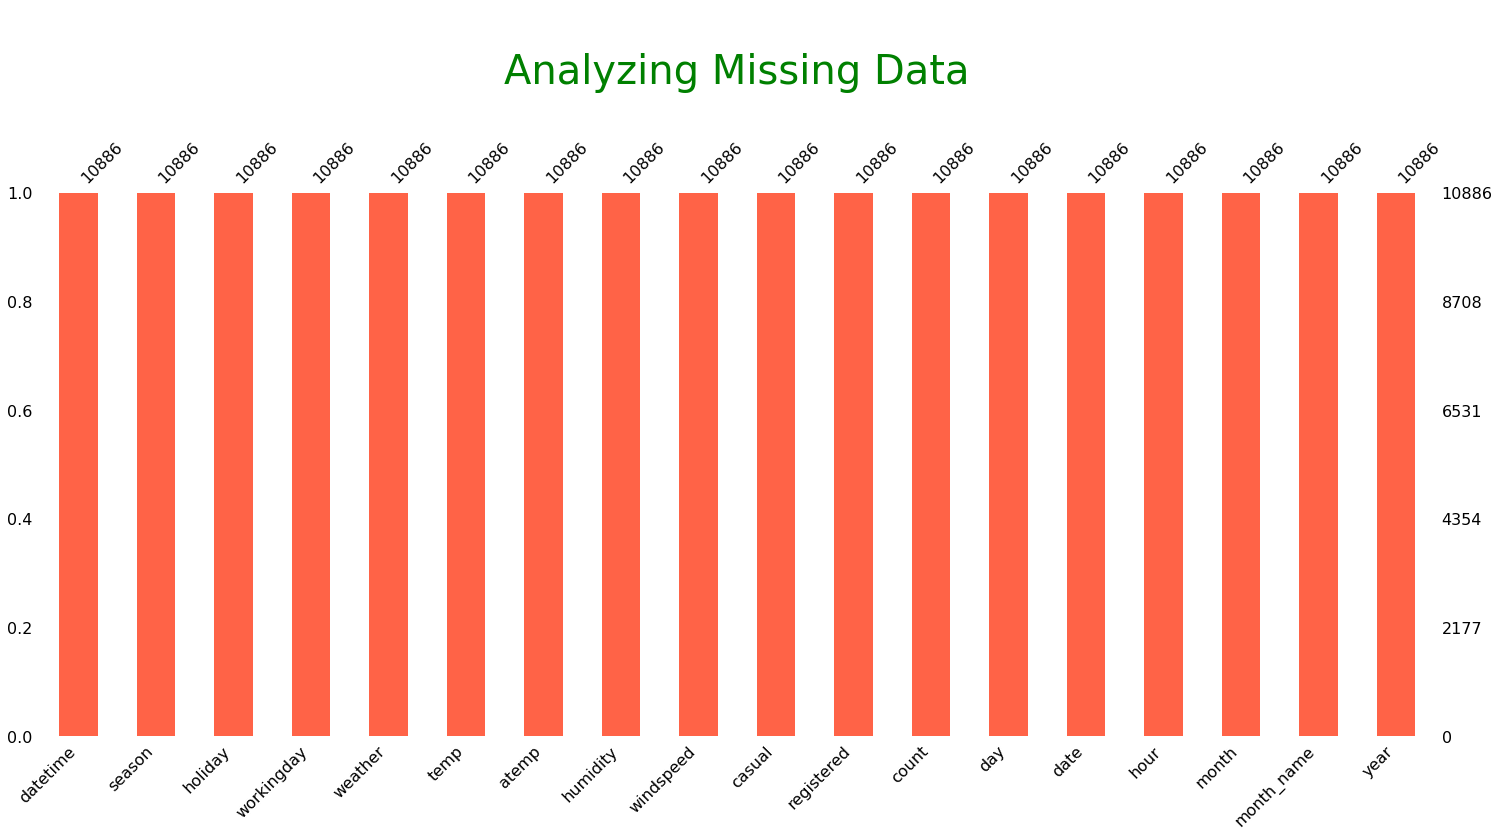

In [ ]:
msno.bar(df, color='tomato')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

# 2 Data Preprocessing



## 2.1 **Summary Statistics of Dataset**

### 2.1.1 Statistical summary about datetime data

In [ ]:
df.describe(include = ['object','datetime64[ns]'])

,datetime,season,holiday,workingday,weather,day,date,month_name
count,10886,10886,10886,10886,10886,10886,10886,10886
unique,10886,4,2,2,4,7,456,12
top,2011-01-01 00:00:00,winter,no,yes,clear,Saturday,2011-01-01,May
freq,1,2734,10575,7412,7192,1584,24,912
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.2 Statistical summary about Numerical data

In [ ]:
df.describe(include = ['int64','float64'])

,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495,2011.501929
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373,0.500019
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000,2011.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000,2012.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000,2012.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000,2012.000000


## 2.2 **Minimum and maximum datetime**

In [ ]:

df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

**The dataset has values between 1st Jan 2011 to 19th Dec 2012**

## 2.3 **Unique Values in each column**

Before we move ahead, let's identify the number of unique values in each column

In [ ]:
df.nunique()

NameError: ignored

In [ ]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

## 2.4 **Categorising Temperature And Humidity Levels and Windspeed column data :**

In [ ]:
pd.DataFrame(df["atemp"].describe()).T

,count,mean,std,min,25%,50%,75%,max
atemp,10886.0,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455


In [ ]:
def get_temp(temp):
    if temp <= 12 : return "very low"
    elif temp > 12 and temp < 24 : return "low"
    elif temp >= 24  and temp < 35 :  return "moderate"
    elif temp >= 35 : return "high"

In [ ]:
df["temperature"]=pd.Series(map(get_temp,df["atemp"]))

In [ ]:
pd.DataFrame(df["humidity"].describe()).T

,count,mean,std,min,25%,50%,75%,max
humidity,10886.0,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0


In [ ]:
def get_humidity(H):
    if 0 <= H <= 10:
        return "10%"
    elif 11 <= H <= 20:
        return "20%"
    elif 21 <= H <= 30:
        return "30%"
    elif 31 <= H <= 40:
        return "40%"
    elif 41 <= H <= 50:
        return "50%"
    elif 51 <= H <= 60:
        return "60%"
    elif 61 <= H <= 70:
        return "70%"
    elif 71 <= H <= 80:
        return "80%"
    elif 81 <= H <= 90:
        return "90%"
    elif 91 <= H <= 100:
        return "100%"

In [ ]:
df["gethumidity"]  = pd.Series(map(get_humidity,df["humidity"]))

In [ ]:
pd.DataFrame(df["windspeed"].describe()).T

,count,mean,std,min,25%,50%,75%,max
windspeed,10886.0,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969


In [ ]:
df["windspeed_category"] = pd.qcut(df["windspeed"],8)

In [ ]:
df["windspeed_category"] = df["windspeed_category"].astype("object")

### 2.1.3 Statistical summary about categorical data

In [ ]:
df.describe(include=["object","category"])

,season,holiday,workingday,weather,day,date,month_name,temperature,gethumidity,windspeed_category
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,7,456,12,4,10,8
top,winter,no,yes,clear,Saturday,2011-01-01,May,moderate,70%,"(-0.001, 6.003]"
freq,2734,10575,7412,7192,1584,24,912,4767,1845,2185


**Insights**

- **Moderate level Temperature frequency is highest in given data**
- **70% humidty**
- **and most preferable windspeed 8-12** 

### 2.5 **Checking Duplicate Rows**

Before we move ahead, let's identify if there are any duplicate rows

In [ ]:
df.duplicated().any()

False

**So, there are no duplicate rows in the dataset**

### 2.6 **Correlation Matrix**

In [ ]:
df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


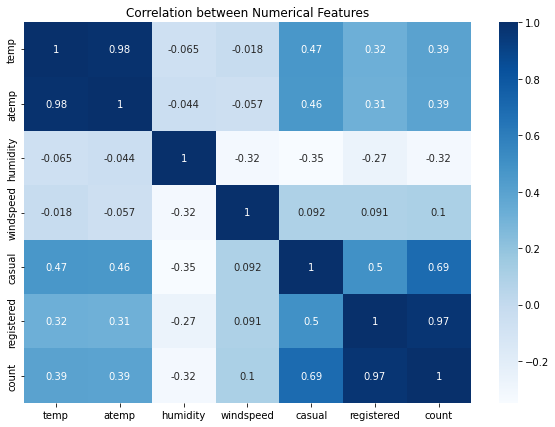

In [ ]:
### Heatmap (correlation between features)
plt.figure(figsize=(10,7))
sns.heatmap(df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(),annot=True,cmap = "Blues")
plt.title("Correlation between Numerical Features")
plt.show()

**Insights**

- Correlation between Temperature and Number of Cycles Rented for all customers : 0.39
- Correlation between Temperature and Number of Cycles Rented for casual subscribers : 0.46
- Correlation between Temperature and Number of Cycles Rented for registered subscribers : 0.31
- Correlation between Temperature and Number of Cycles Rented for registered subscribers : 0.31
- Humidity has a negative correlation with the number of cycles rented which is -0.32

## Pre-processed Data Sample  : 

In [ ]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,day,date,hour,month,month_name,year,temperature,gethumidity,windspeed_category
5888,2012-02-01 13:00:00,spring,no,yes,clear,18.86,22.725,47,15.0013,12,...,186,Wednesday,2012-02-01,13,2,February,2012,low,50%,"(12.998, 15.001]"
9131,2012-09-03 20:00:00,fall,yes,no,clear,29.52,34.090,76,7.0015,78,...,261,Monday,2012-09-03,20,9,September,2012,moderate,80%,"(6.003, 7.002]"
10134,2012-11-07 15:00:00,winter,no,yes,partly_clear,13.12,15.150,53,19.9995,20,...,198,Wednesday,2012-11-07,15,11,November,2012,low,60%,"(16.998, 22.003]"
9058,2012-08-19 19:00:00,fall,no,no,partly_clear,26.24,30.305,73,8.9981,72,...,341,Sunday,2012-08-19,19,8,August,2012,moderate,80%,"(7.002, 8.998]"
10306,2012-11-14 20:00:00,winter,no,yes,clear,12.30,15.910,52,6.0032,15,...,267,Wednesday,2012-11-14,20,11,November,2012,low,60%,"(-0.001, 6.003]"
10351,2012-11-16 17:00:00,winter,no,yes,clear,14.76,17.425,46,12.9980,41,...,580,Friday,2012-11-16,17,11,November,2012,low,50%,"(8.998, 12.998]"
2417,2011-06-08 15:00:00,summer,no,yes,clear,37.72,43.940,40,11.0014,28,...,128,Wednesday,2011-06-08,15,6,June,2011,high,40%,"(8.998, 12.998]"
4125,2011-10-03 22:00:00,winter,no,yes,partly_clear,16.40,20.455,82,0.0000,12,...,91,Monday,2011-10-03,22,10,October,2011,low,90%,"(-0.001, 6.003]"
8383,2012-07-10 16:00:00,fall,no,yes,clear,32.80,36.365,43,15.0013,89,...,435,Tuesday,2012-07-10,16,7,July,2012,high,50%,"(12.998, 15.001]"
7726,2012-06-02 07:00:00,summer,no,no,clear,21.32,25.000,72,7.0015,9,...,86,Saturday,2012-06-02,7,6,June,2012,moderate,80%,"(6.003, 7.002]"


**About the features :**

  - **dependent variables**  : count / registerd / casual 

  - **independent variables** : workingday / holiday / weather / seasons /temperature /humidity /windspeed

# 3 Univariate and Bivariate Analysis

### 3.1 **Univariate Analysis**

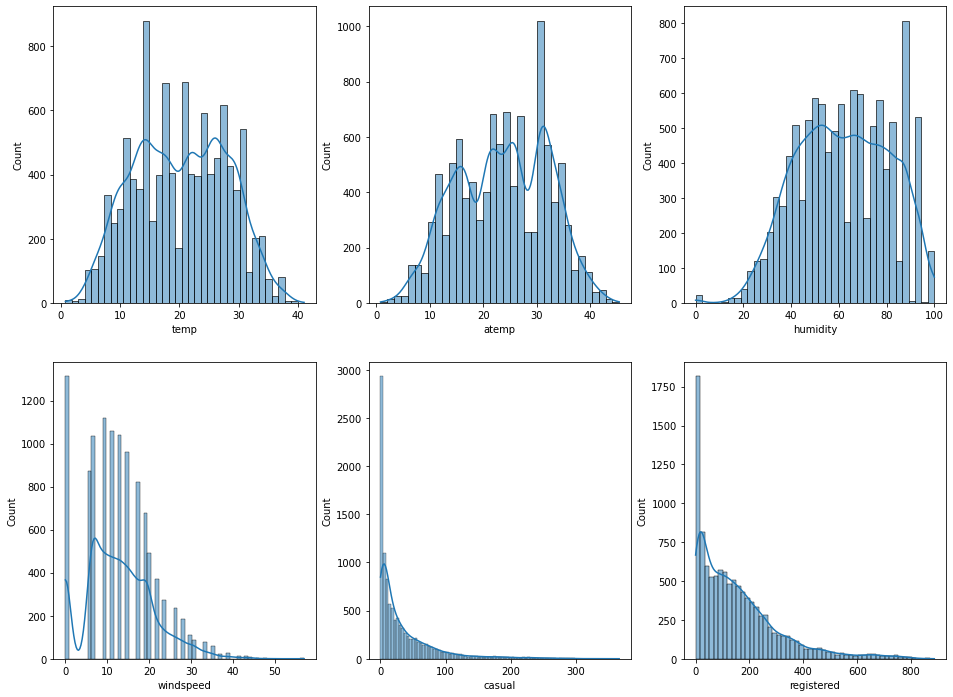

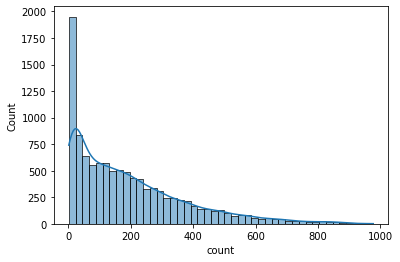

In [ ]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

**Insights:**

    - **casual**, **registered** and **count** somewhat looks like **Log Normal Distrinution**
    - **temp**, **atemp** and **humidity** looks like they follows the **Normal Distribution**
    - **windspeed** follows the **binomial distribution**

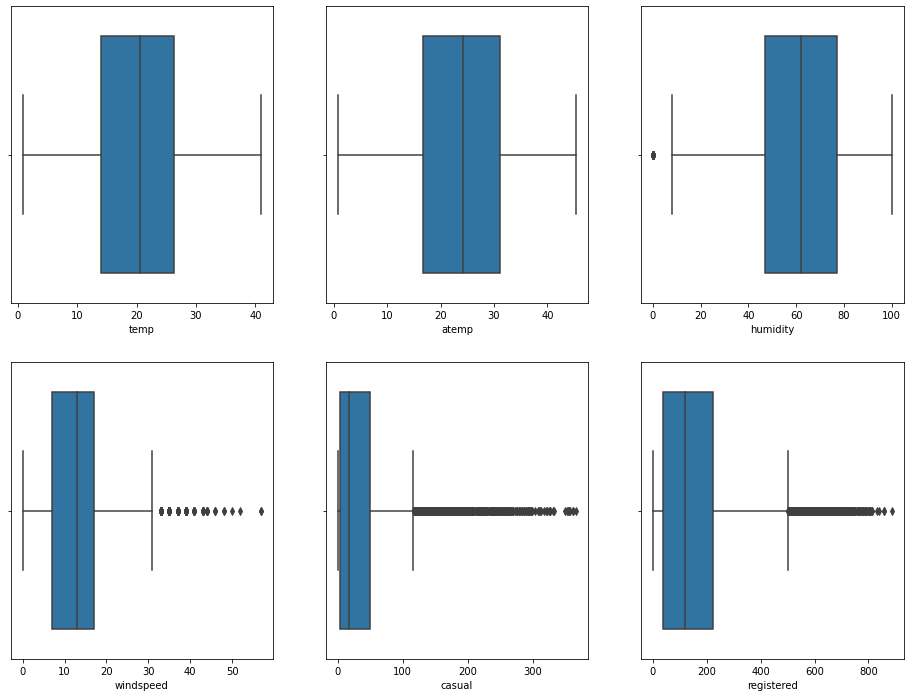

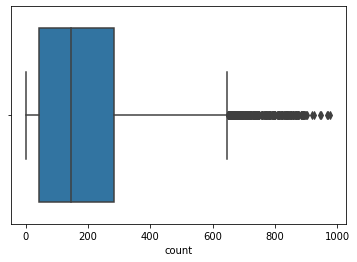

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

Looks like **humidity**, **casual**, **registered** and **count** have outliers in the data.

### Outlier detection in Dataset : 

In [ ]:
# function for outlier detection
def detect_outliers(df):
    length_before = len(df)
    Q1 = np.percentile(df,25)
    Q3 = np.percentile(df,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(df[(df>lowerbound)&(df<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"
    

In [ ]:
rentedCyclesPerHour  = df["count"]

In [ ]:
detect_outliers(rentedCyclesPerHour)

'0.0278 % Outliers data from input data found'

## Outlier treatment

In [ ]:
numeric_types = ['int64', 'float64']
get_columns_by_types = lambda df, types: [df.columns[index] for index in range(len(df.columns)) if df.dtypes[index].name in types]

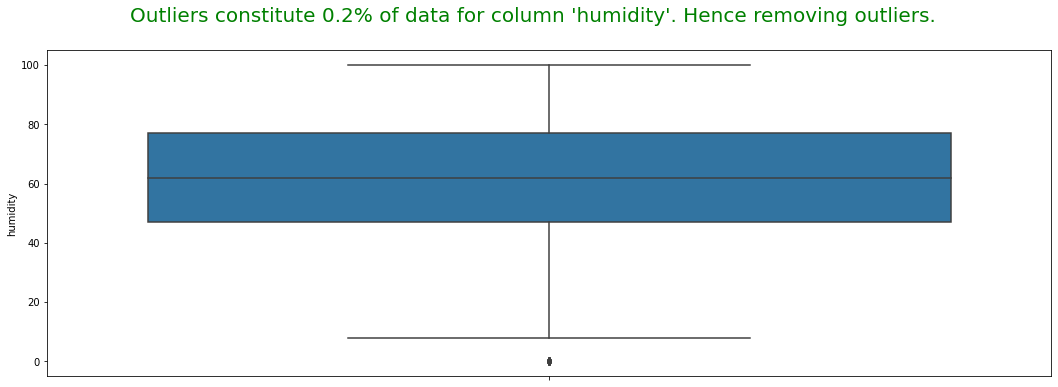

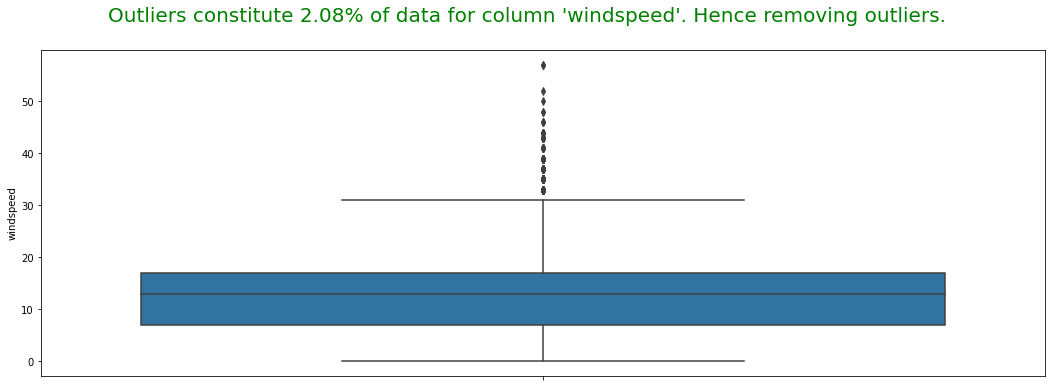

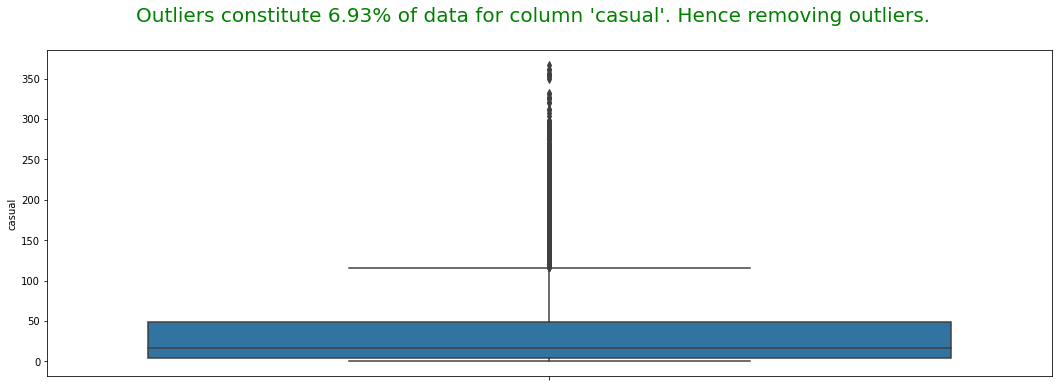

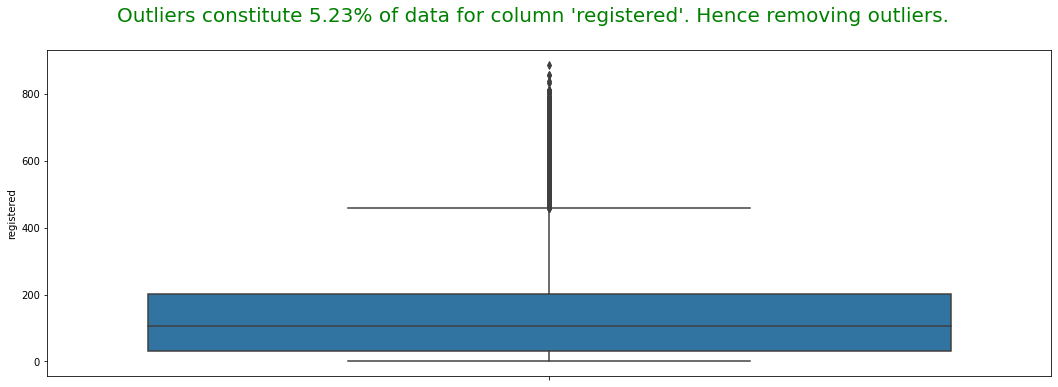

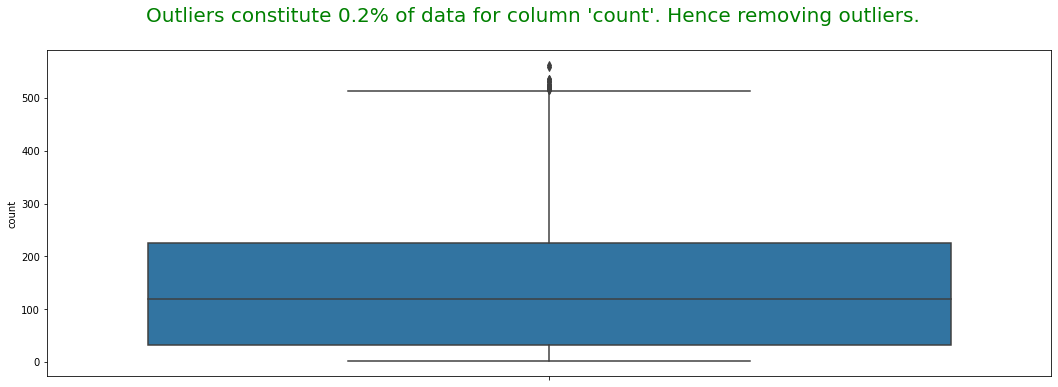

In [ ]:
for column in get_columns_by_types(df, numeric_types):
    df = remove_outlier(df, column)

#### 3.1.1 **Univariate Analysis for Categorical Columns**

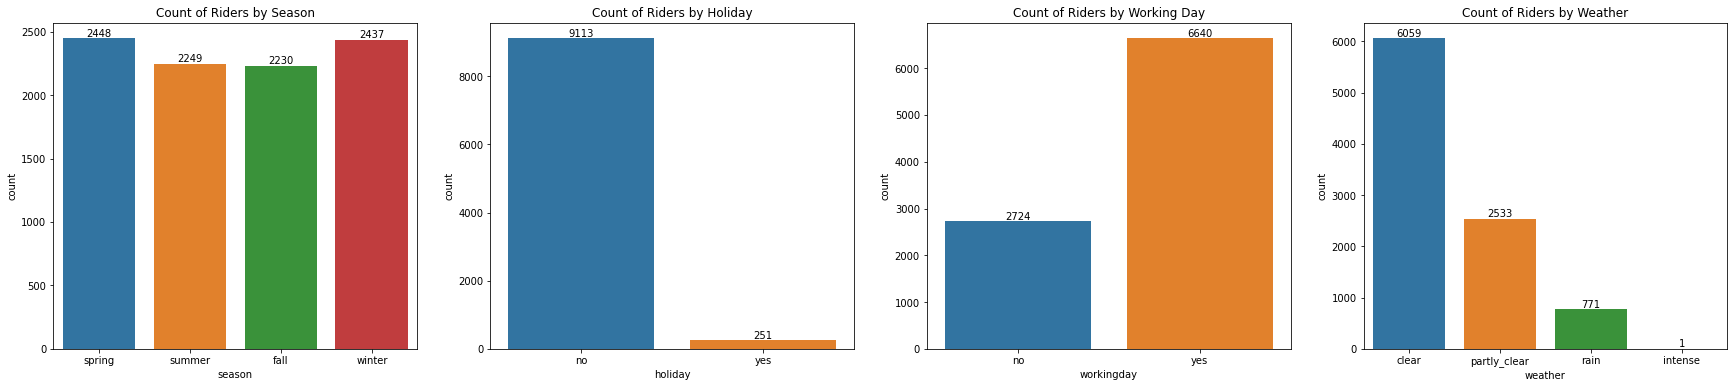

In [ ]:
fig,axes=plt.subplots(nrows=1, ncols=4, figsize=(30,6))
sns.countplot(x='season', data=df, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Riders by Season')
sns.countplot(x='holiday', data=df, ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Count of Riders by Holiday')
sns.countplot(x='workingday', data=df, ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Count of Riders by Working Day')
sns.countplot(x='weather', data=df, ax=axes[3])
axes[3].bar_label(axes[3].containers[0])
axes[3].set_title('Count of Riders by Weather')
plt.show()

**Insights:**

    - The number of riders in all seasons is almost the same.
    - More number of riders (97% of them) ride on non-holidays.
    - More number of riders (68% of them) ride on working days.
    - Nearly 92% of the riders ride on days when the weather is clear or partly clear.

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly `Clear, Few clouds, partly cloudy, partly cloudy`.

#### 3.1.2 **Univariate Analysis for Continuous Columns**

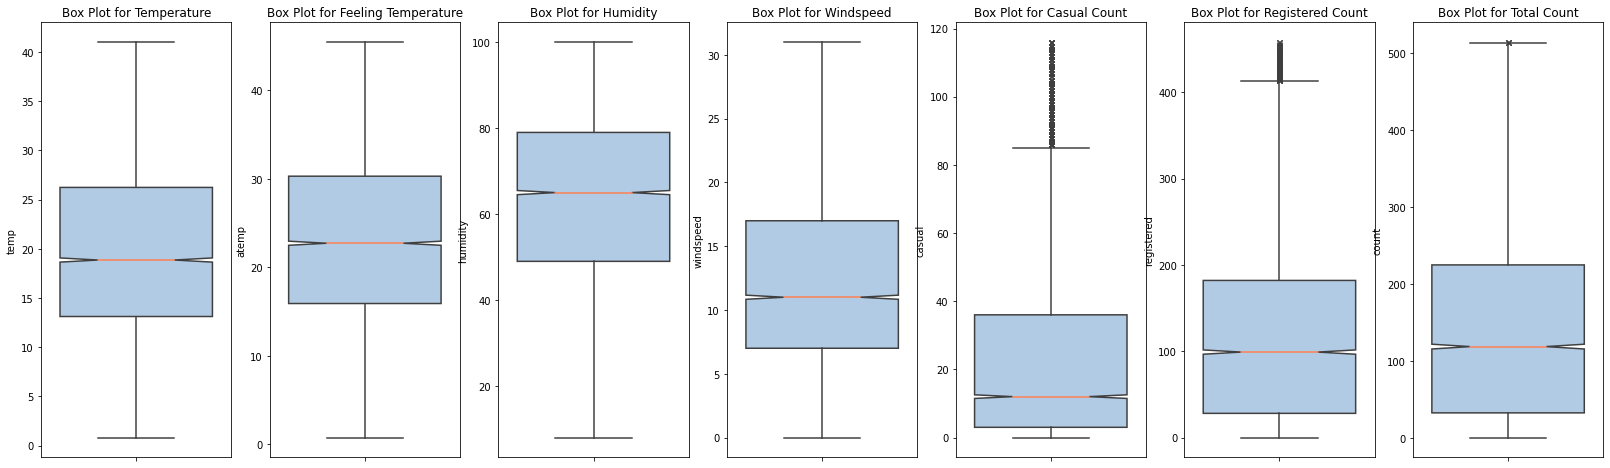

In [ ]:
fig,axes=plt.subplots(1,7,figsize=(28,8))
sns.boxplot(data=df, y="temp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[0])
axes[0].set_title('Box Plot for Temperature')

sns.boxplot(data=df, y="atemp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[1])
axes[1].set_title('Box Plot for Feeling Temperature')

sns.boxplot(data=df, y="humidity",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[2])
axes[2].set_title('Box Plot for Humidity')

sns.boxplot(data=df, y="windspeed",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[3])
axes[3].set_title('Box Plot for Windspeed')

sns.boxplot(data=df, y="casual",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[4])
axes[4].set_title('Box Plot for Casual Count')

sns.boxplot(data=df, y="registered",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[5])
axes[5].set_title('Box Plot for Registered Count')

sns.boxplot(data=df, y="count",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[6])
axes[6].set_title('Box Plot for Total Count')

plt.show()

**Insights:**

   - The mean and the median temperature in the dataset is approximately around 20°C.
   - The mean and the median feeling temperature in the dataset is approximately around 24°C.
   - The mean and the median humidity in the dataset is approximately around 62%.
   - The windspeed is approximately around 13, with large number of outliers.
   - There is a large number of outliers for casual, registered and total count of riders between 1st Jan 2011 to 19th Dec 2012. That could be due to the increase in the number of riders over this period. Let us investigate this with the help of time series analysis.

#### 3.1.3 **Distribution of Casual, Registered and Total Riders by Weather and Season**

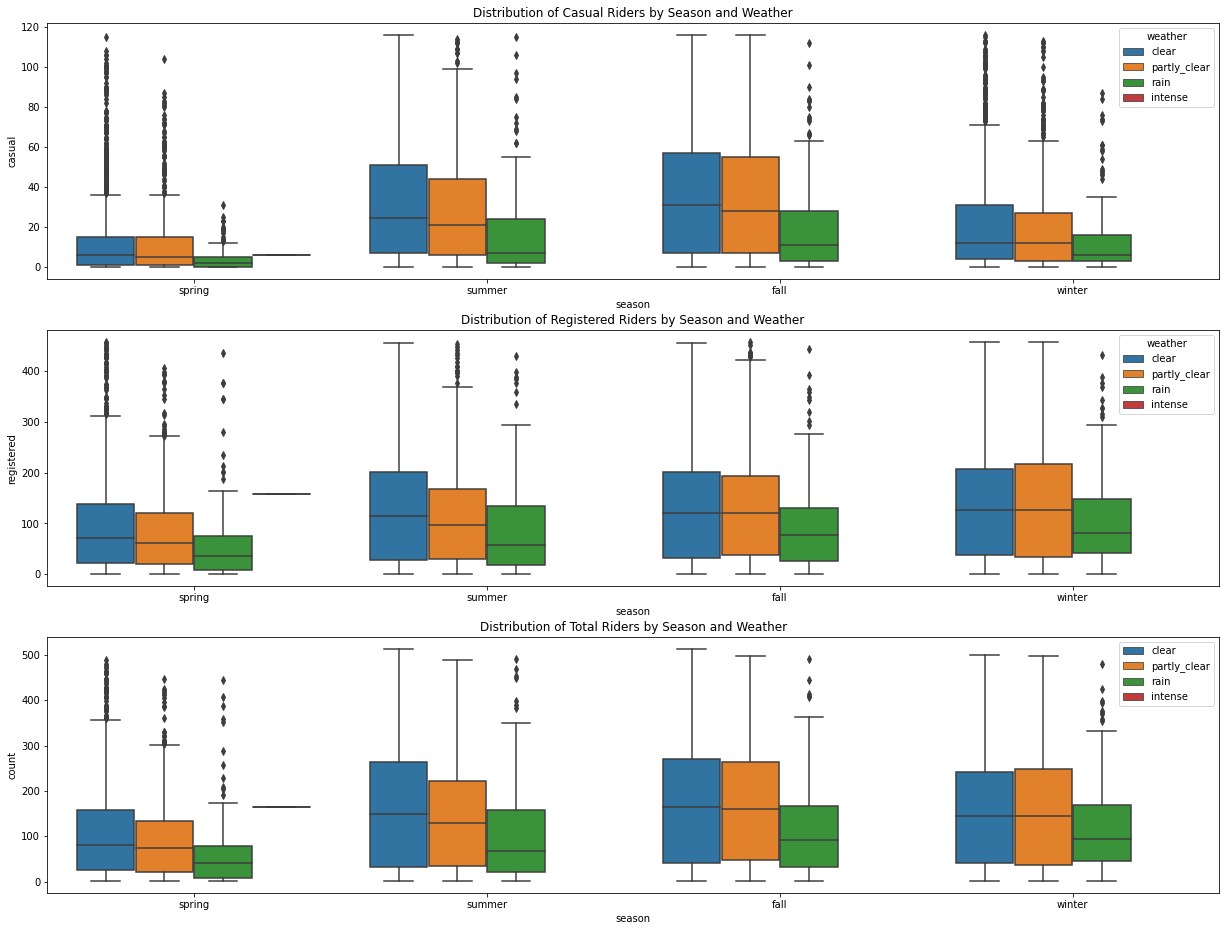

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(21,16))

sns.boxplot(data=df, y="casual", x = 'season', hue = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season and Weather')

sns.boxplot(data=df, y="registered", x = 'season', hue = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season and Weather')

sns.boxplot(data=df, y="count", x = 'season', hue = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season and Weather')
plt.legend(loc='upper right')
plt.show()

**Insights:**

   - The number of riders in every season is highest in clear and partly_clear weather

## 3.2 **Bivariate Analysis**

## **Plotting categorical variables againt count using boxplots**

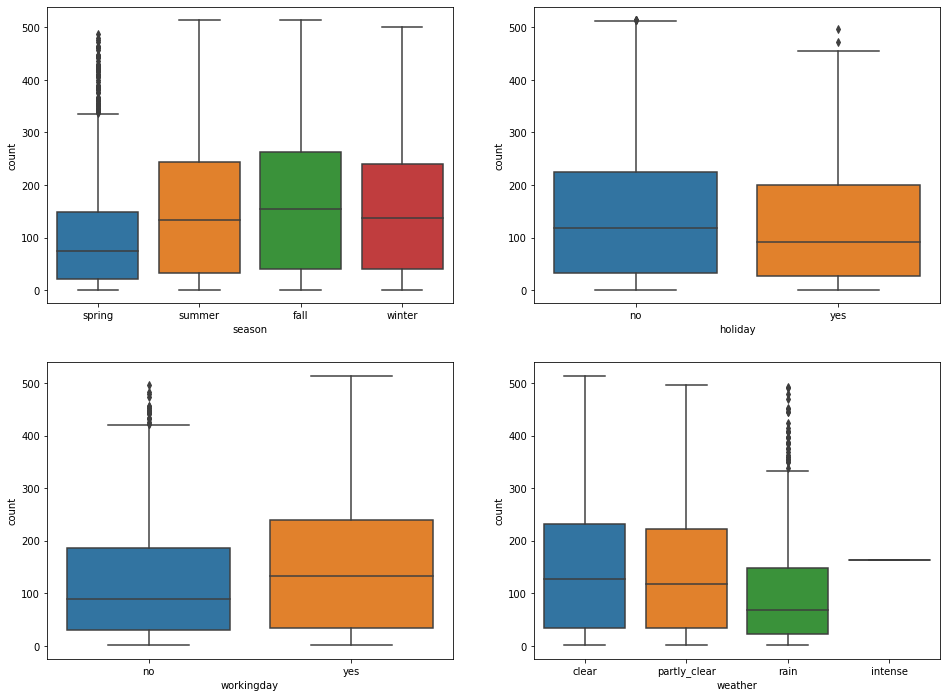

In [ ]:

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

**Insights:**

   - In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
   - Whenever its a **holiday** more bikes are rented.
   - It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
   - Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented.

## **Plotting numerical variables againt count using scatterplot**

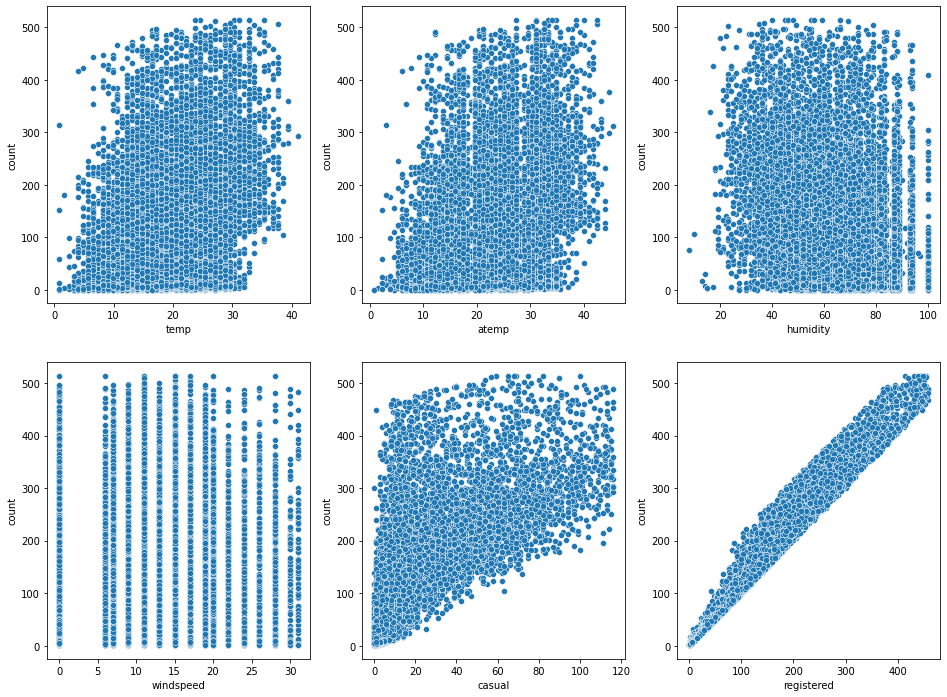

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

**Insights:**

   - Whenever the humidity is less than 20, number of bikes rented is	sparse
   - Whenever the temperature is less than 10, number of bikes rented is less.
   - Whenever the windspeed is greater than 35, number of bikes rented is less.

### 3.2.1 **Increase in Casual, Registered, and Total Riders over time**

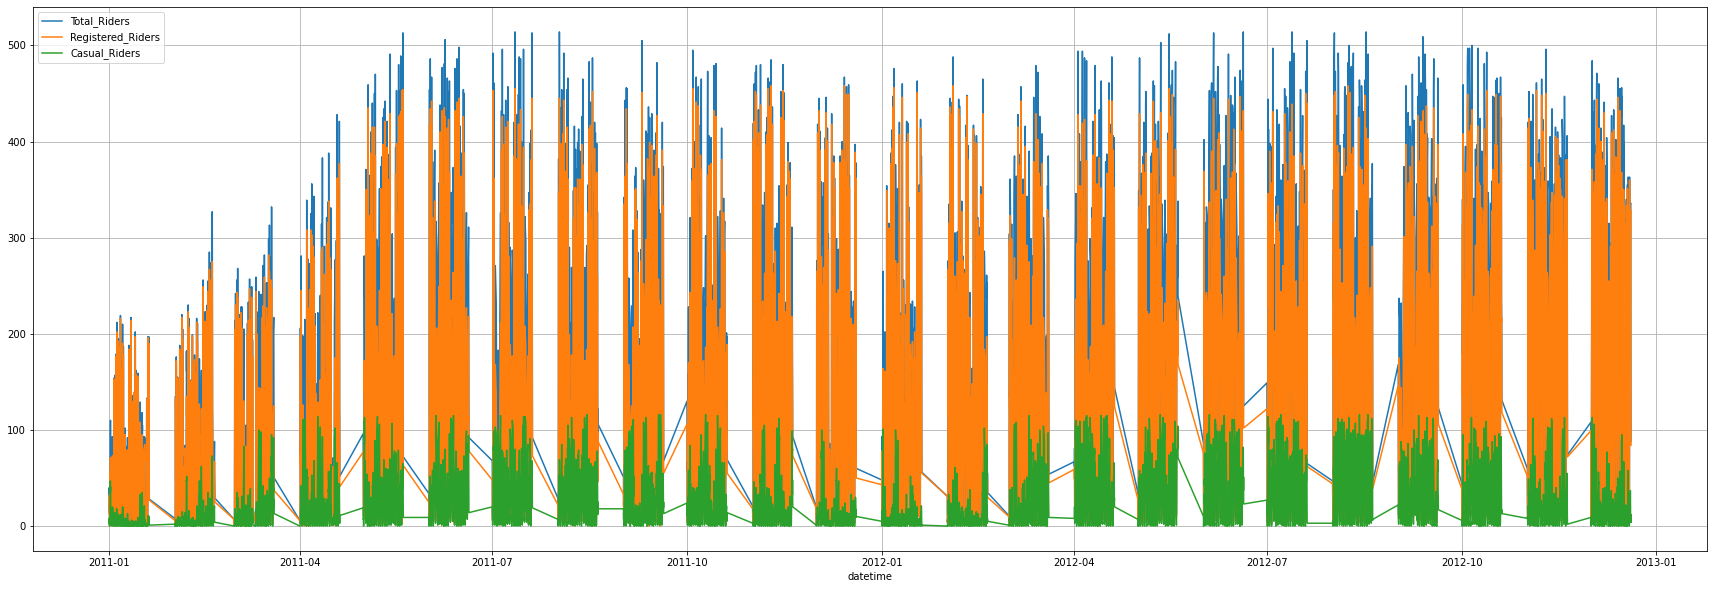

In [ ]:
plt.figure(figsize=(30,10))
sns.color_palette('husl')
sns.lineplot(x = df['datetime'],y = df['count'].values)
sns.lineplot(x = df['datetime'],y = df['registered'].values)
sns.lineplot(x = df['datetime'],y = df['casual'].values)
plt.legend(['Total_Riders','Registered_Riders','Casual_Riders'])
plt.grid()
plt.show()

**Insights:**

   - The number of casual, registered and total riders has increased considerably between 1st Jan 2011 to 19th Dec 2012.
   - There is also a definite trend and seasonality as we can see increase in number of riders from spring to summer to fall and then a decrease in the number of riders in winter before rising again in spring next season.

### 3.2.2 **Distribution of Casual, Registered and Total Riders by Season**

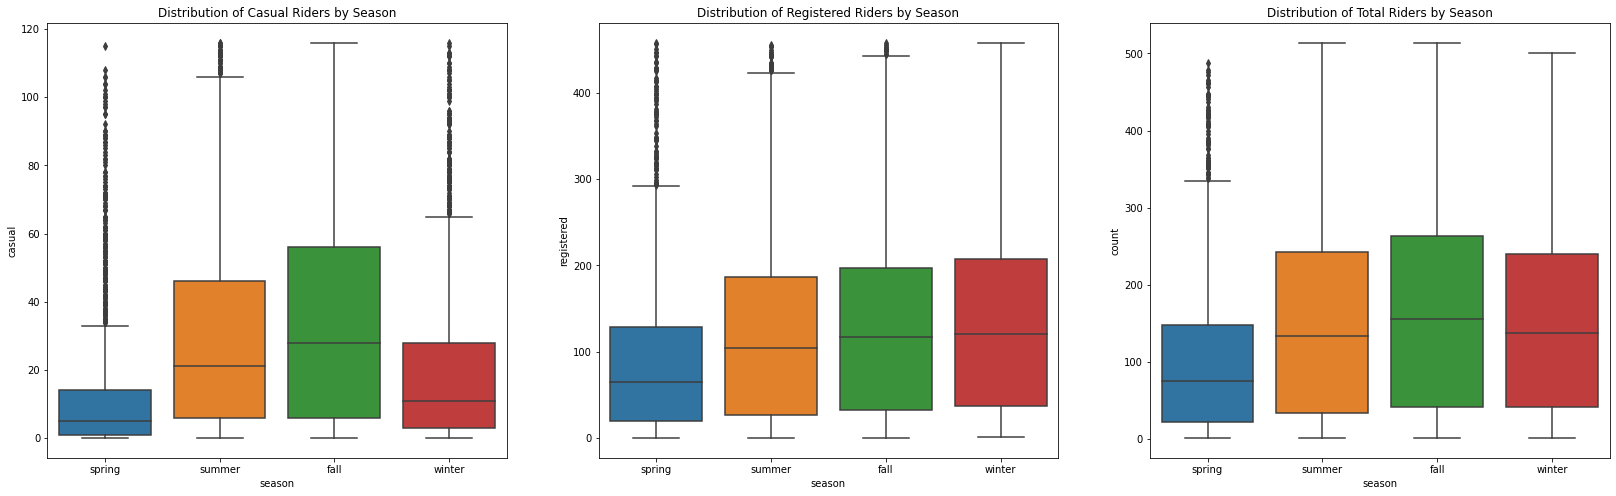

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'season', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=df, y="registered", x = 'season', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=df, y="count", x = 'season', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

**Insights:**

    - The median number of casual, registered and total riders is highest in fall and summer season followed by winter and spring season.

### 3.2.3 **Distribution of Casual, Registered and Total Riders by Holiday**

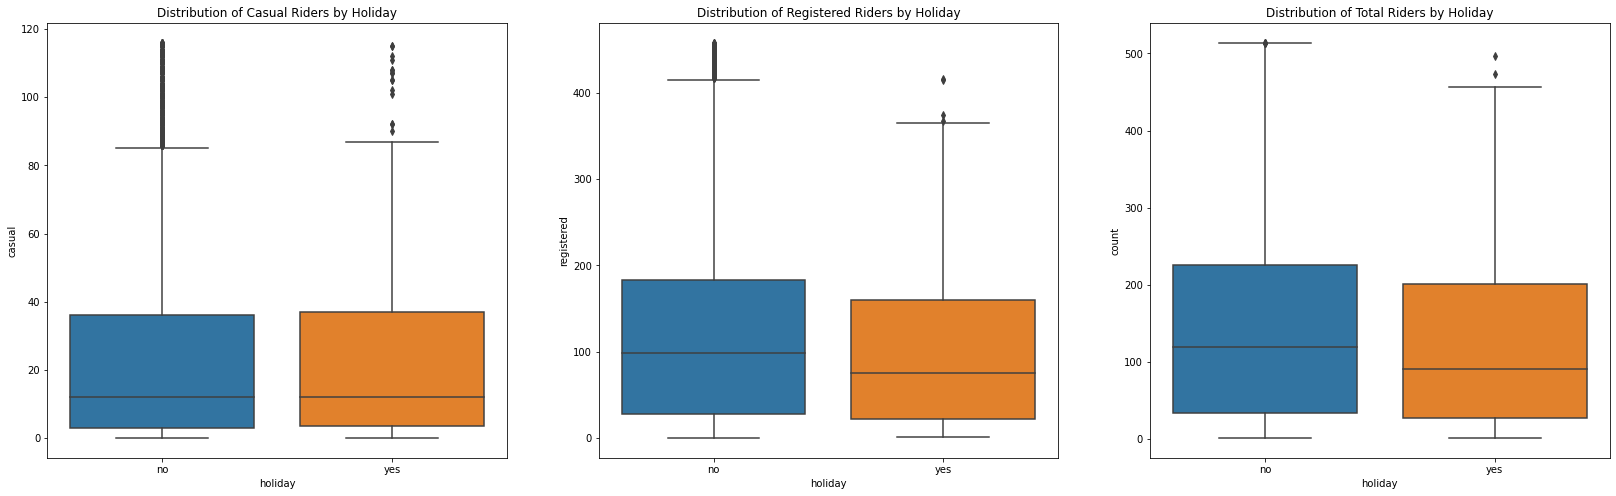

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'holiday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Holiday')

sns.boxplot(data=df, y="registered", x = 'holiday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Holiday')

sns.boxplot(data=df, y="count", x = 'holiday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Holiday')

plt.show()

**Insights:**

   - The median number of casual, registered and total riders is almost equal irrespective of whether it is a holiday or not.

### 3.2.4 **Distribution of Casual, Registered and Total Riders by Working Day**

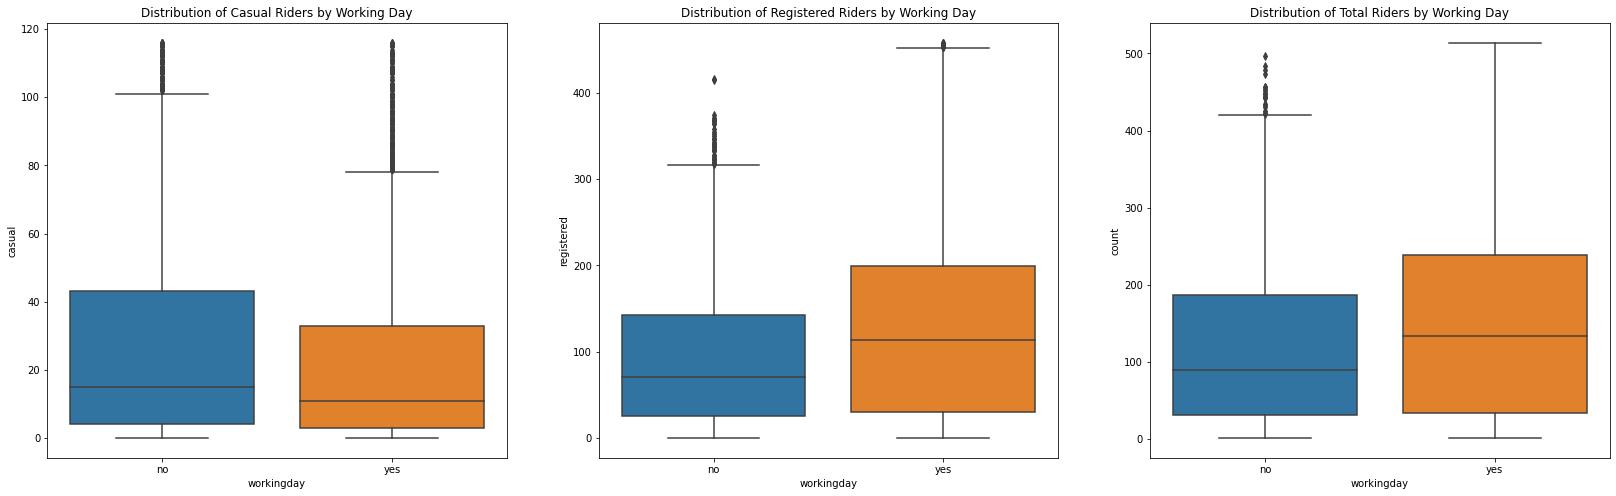

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'workingday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Working Day')

sns.boxplot(data=df, y="registered", x = 'workingday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Working Day')

sns.boxplot(data=df, y="count", x = 'workingday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Working Day')

plt.show()

**Insights:**

   - The median number of casual, registered and total riders is almost equal irrespective of whether it is a working day or not.

### 3.2.5 **Distribution of Casual, Registered and Total Riders by Weather**

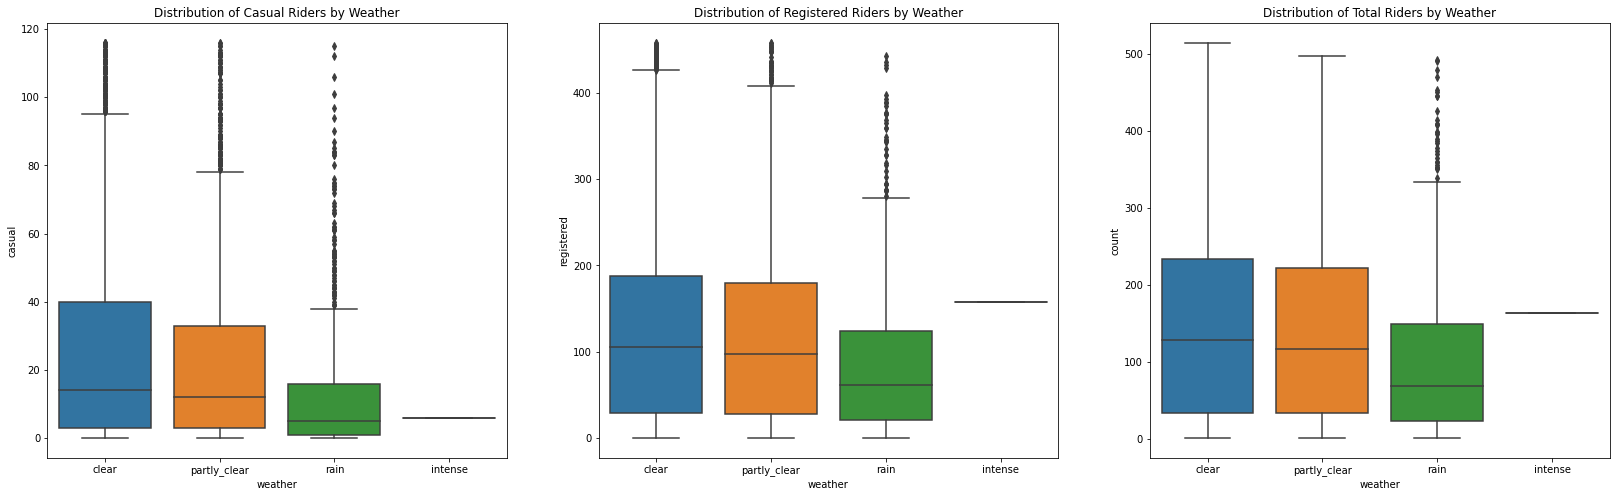

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=df, y="casual", x = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Weather')

sns.boxplot(data=df, y="registered", x = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Weather')

sns.boxplot(data=df, y="count", x = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Weather')

plt.show()

**Insights:**

    - The median number of casual, registered and total riders is highest when the weather is clear, followed by the number of casual, registered and total riders when the weather is partly_clear.

### 3.2.6 **Average Number of Cycles rented by `Casual vs Registered Subscribes**

In [ ]:
registered_per_hour_median = df.groupby("hour")["registered"].median()
casual_per_hour_median = df.groupby("hour")["casual"].median()

In [ ]:
registered_per_hour_median = registered_per_hour_median.reset_index()

In [ ]:
casual_per_hour_median = casual_per_hour_median.reset_index()

In [ ]:
registered_per_hour_median["hour"]+= 1

In [ ]:
casual_per_hour_median["hour"]+= 1

In [ ]:
median_count_perHr = registered_per_hour_median.merge(casual_per_hour_median,on="hour")

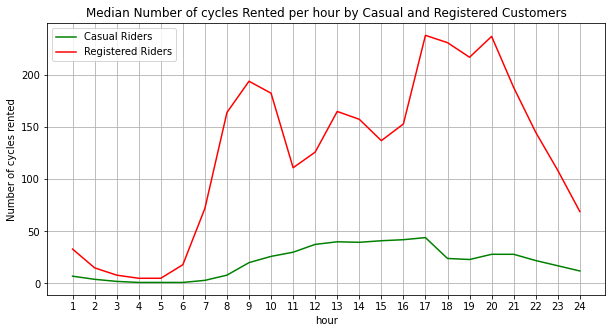

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x = median_count_perHr["hour"],
             y = median_count_perHr["casual"],color="g",legend='auto')
sns.lineplot(x = median_count_perHr["hour"],
             y = median_count_perHr["registered"],color="r",legend='auto')
plt.legend(["Casual Riders","Registered Riders"])
plt.title("Median Number of cycles Rented per hour by Casual and Registered Customers")
plt.grid()
plt.xticks(np.arange(1,25,1))
plt.ylabel("Number of cycles rented")
plt.show()

**From above linplot :** 
- **registered customers seems to be using rental cycles mostly for work-commute purposes.** 
- **registered cycle counts seems to be much higher than the casual customers.** 

In [ ]:
print("Casual Users (in %) :")
(df["casual"].sum()/df["count"].sum())*100

Casual Users (in %) :


16.301518856613765

In [ ]:
print("Registered Users (in %) : ")
(df["registered"].sum()/df["count"].sum())*100

Registered Users (in %) : 


83.69848114338623

**Insights**
- **81% cycles had been rented by registered customers.** 
- **19% cycles had been rented by casual customers.** 

# 4 **Correlation among different factors**

In [ ]:
# Understanding the correlation between count and numerical variables 
df.corr()['count']

temp          0.337470
atemp         0.333909
humidity     -0.298090
windspeed     0.115870
casual        0.715850
registered    0.984471
count         1.000000
hour          0.459915
month         0.173165
year          0.170871
Name: count, dtype: float64

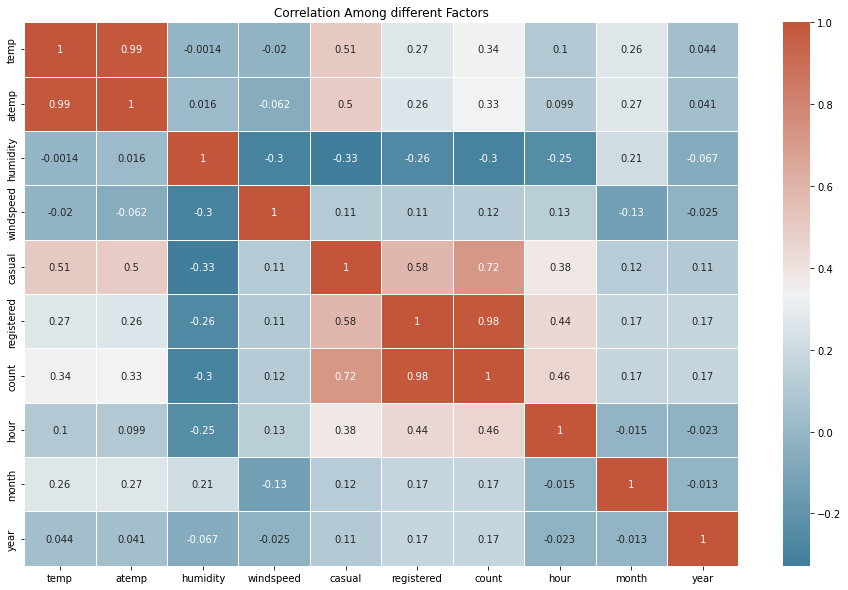

In [ ]:
yuluCorr = df.corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among different Factors')
sns.heatmap(yuluCorr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights:**

- There is a very less correlation between {temperature, feeling temperature, humidity and windspeed} and {casual, registered and count} variables.
- There is a very strong correlation between temperature and feeling temperature.
- There is a very strong correlation between casual and total riders, as casual riders contribute to the total number of riders for Yulu.
- There is a very strong correlation between registered and total riders, as registered riders *contribute* to the total number of riders for Yulu.    

# 5 **Relationship between Dependent and Independent Variables**

### 5.1 **Effect of working day on number of electric cycles rented**

**Let us first set-up the hypothesis framework**

**Ho:** Working Day has no effect on the number of electric cycles rented

**H1:** Working Day has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Two Sample T-test

In [ ]:
working_day_no = np.array(df[df.workingday == 'no']['count'])
working_day_yes = np.array(df[df.workingday == 'yes']['count'])
stats.ttest_ind(a=working_day_no, b=working_day_yes, equal_var=True)

Ttest_indResult(statistic=-12.084616332054733, pvalue=2.2552148137228035e-33)

**Insights:**

    - Since, pvalue(0.226) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - working day has no effect on the number of electric cycles rented. 
    - This implies that at 95% confidence level, the mean of number of riders on non-working day is statistically not different from the mean number of riders on working day.

### 5.2 **Effect of holiday on number of electric cycles rented**

**Let us first set-up the hypothesis framework**

**Ho:** Holiday has no effect on the number of electric cycles rented

**H1:** Holiday has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Two Sample T-test

In [ ]:
holiday_no = np.array(df[df.holiday == 'no']['count'])
holiday_yes = np.array(df[df.holiday == 'yes']['count'])
stats.ttest_ind(a=holiday_no, b=holiday_yes, equal_var=True)

Ttest_indResult(statistic=2.026518727208322, pvalue=0.04273994729053667)

**Insights:**

    - Since, pvalue(0.5736) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - holiday has no effect on the number of electric cycles rented. 
    - This implies that at 95% confidence level, the mean of number of riders on non-holiday is statistically not different from the mean number of riders on holiday.

### 5.3 **Number of cycles rented similar or different in different seasons**

**Let us first set-up the hypothesis framework**

**Ho:** Season has no effect on the number of electric cycles rented

**H1:** Season has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** One Way ANOVA

In [ ]:
season_spring = np.array(df[df.season == 'spring']['count'])
season_summer = np.array(df[df.season == 'summer']['count'])
season_fall = np.array(df[df.season == 'fall']['count'])
season_winter = np.array(df[df.season == 'winter']['count'])

**Let us now calculate,**

The degree of freedom(**dfn**) for different seasons, and 
    
The degree of freedom(**dfd**) for all data points within different seasons

In [ ]:
dfn = 3
dfd = len(season_spring) - 1 + len(season_summer) - 1 + len(season_fall) - 1 + len(season_winter) - 1

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import f
critical_region = f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6058577880302964


**Let us now calculate the f-statistic based on data points**

In [ ]:
from scipy.stats import f_oneway

f_oneway(season_spring, season_summer, season_fall, season_winter)

F_onewayResult(statistic=148.06214819202174, pvalue=9.583582124778882e-94)

**Insights:**

    - Since, pvalue(6.164843386499654e-149) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - season has no effect on the number of electric cycles rented. 
    - This implies that at 95% confidence level, the mean of number of riders in different seasons is statistically different for atleast one season.

### 5.4 **Number of cycles rented similar or different in different weather**

**Let us first set-up the hypothesis framework**

**Ho:** Weather has no effect on the number of electric cycles rented

**H1:** Weather has effect on the number of electric cycles rented

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** One Way ANOVA

In [ ]:
weather_clear = np.array(df[df.weather == 'clear']['count'])
weather_partly_clear = np.array(df[df.weather == 'partly_clear']['count'])
weather_rain = np.array(df[df.weather == 'rain']['count'])
weather_intense = np.array(df[df.weather == 'intense']['count'])

**Let us now calculate,**

The degree of freedom(**dfn**) for different weather, and 
    
The degree of freedom(**dfd**) for all data points within different weather points

In [ ]:
dfn = 3
dfd = len(weather_clear) - 1 + len(weather_partly_clear) - 1 + len(weather_rain) - 1 + len(weather_intense) - 1

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import f
critical_region = f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6058577880302964


**Let us now calculate the f-statistic based on data points**

In [ ]:
from scipy.stats import f_oneway

f_oneway(weather_clear, weather_partly_clear, weather_rain, weather_intense)

F_onewayResult(statistic=37.2968446919463, pvalue=5.95629355789377e-24)

**Insights:**

    - Since, pvalue(5.482069475935669e-42) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - weather has no effect on the number of electric cycles rented. 
    - This implies that at 95% confidence level, the mean of number of riders in different weather is statistically different for atleast one weather

### 5.5 **Dependency of Weather on Seasons**

**Let us first set-up the hypothesis framework**

**Ho:** Weather is independent on season

**H1:** Weather is dependent on season

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Chi-Square Test of Independence

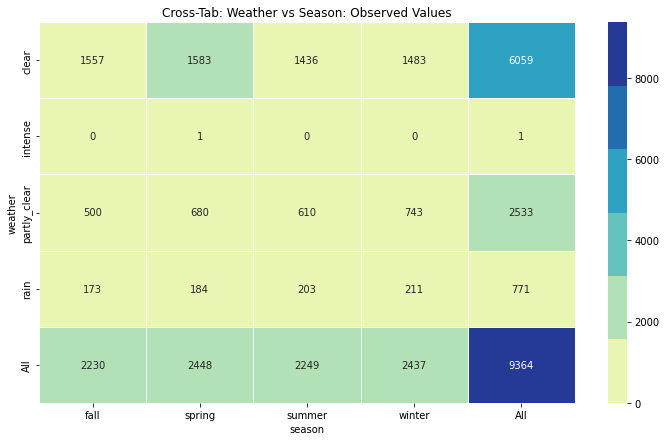

In [ ]:
df1 = pd.crosstab(index=df["weather"], columns=df["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df1, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Please Note:** We need to remove data points for intense weather conditions as for Chi-Square Test of Independence - The expected value inside each cell needs to be at least five in order for you to use this test.

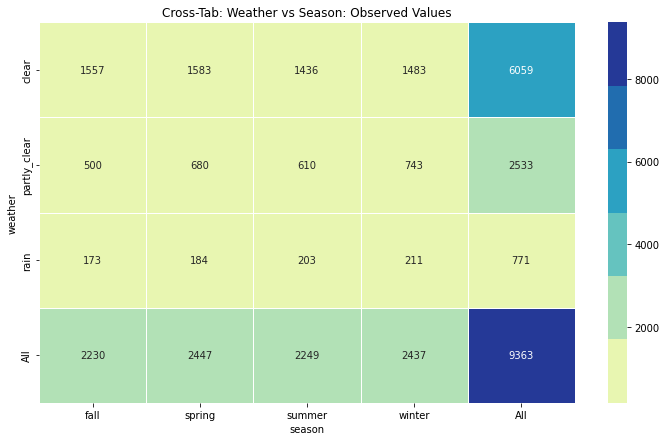

In [ ]:
df2 = df[df["weather"] != 'intense']
df2 = pd.crosstab(index=df2["weather"], columns=df2["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df2, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import chi2
chi2.ppf(q=0.95, df=6)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6058577880302964


**Let us now calculate the χ2-Statistic based on data points**

In [ ]:
from scipy.stats import chi2_contingency

observed = [[1930, 1759, 1801, 1702],
            [604, 715, 708, 807],
            [199, 211, 224, 225]]

chi2_contingency(observed)

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
        [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
        [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]]))

**Insights:**

    - Since, pvalue(2.8260014509929403e-08) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - weather is independent of season
    - This implies that at 95% confidence level, weather is dependent on seasons.

# 6 **Test of Normality**

### 6.1 **Histogram**

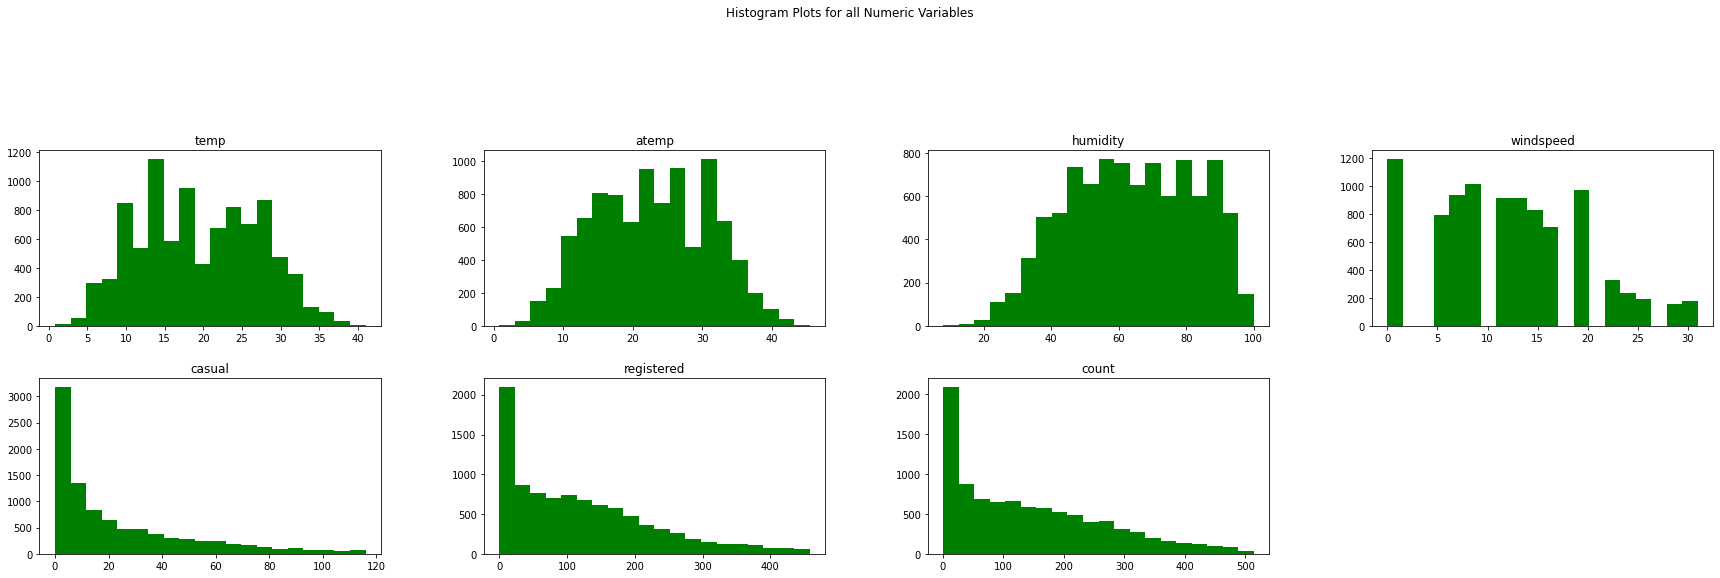

In [ ]:
yulu_cont = df[['temp','atemp','humidity','windspeed','casual','registered','count']]
yulu_cont.hist(layout = (5,4), color = 'green', figsize = (30,20), grid = False, bins = 20)
plt.suptitle('Histogram Plots for all Numeric Variables')
plt.show()

**Insights**

    - We see from the above plot that the distribution of all the variables is skewed and hence are not normally distributed.

### 6.2 **Q-Q Plot**

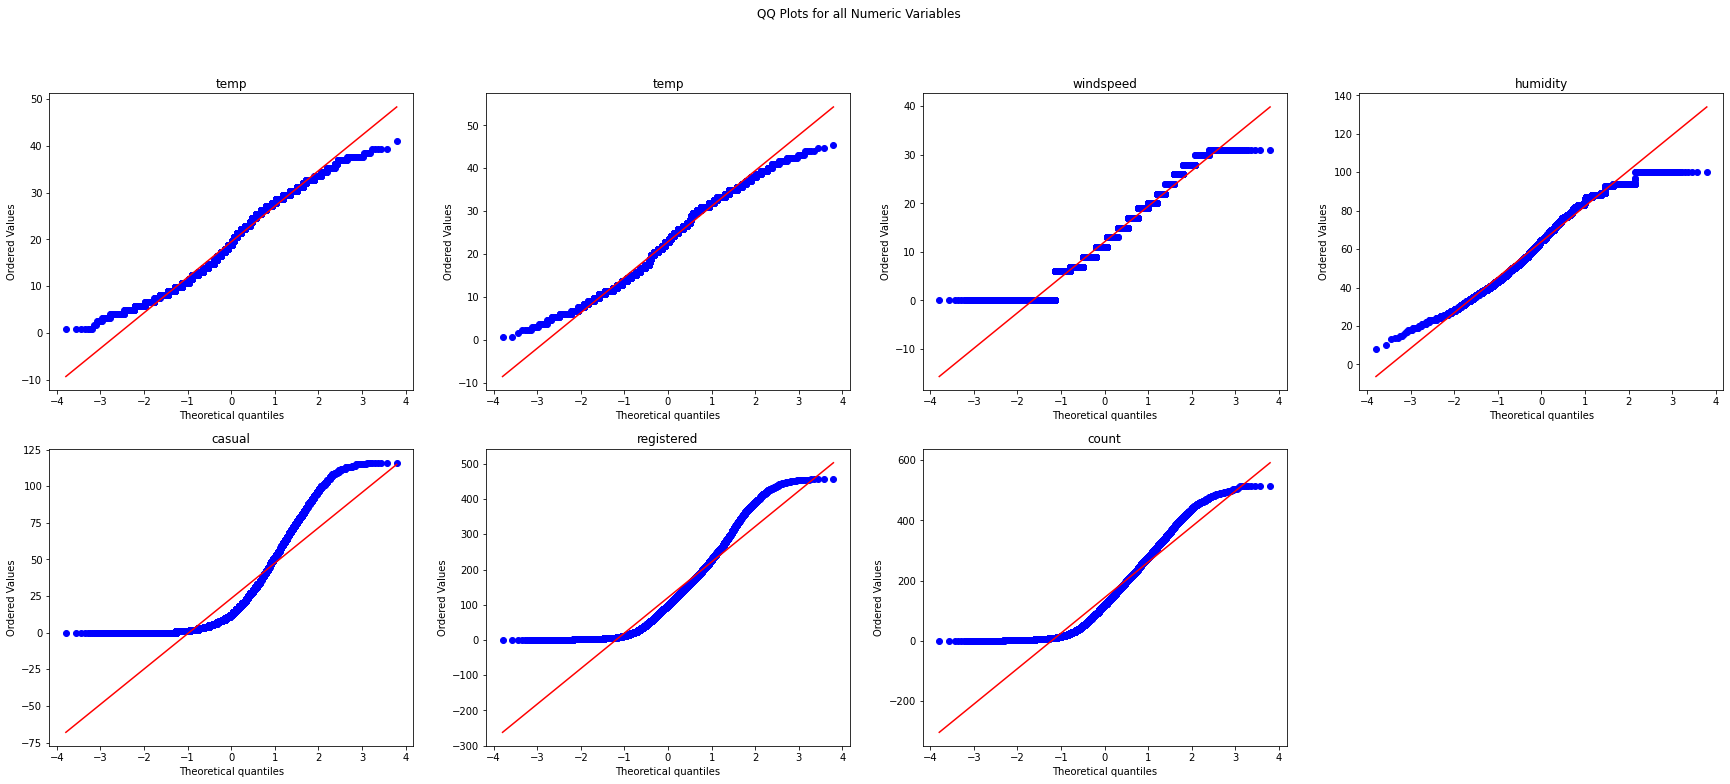

In [ ]:
import pylab 
import scipy.stats as stats

plt.figure(figsize=(30,12))

ax1 = plt.subplot(241)
res = stats.probplot(yulu_cont['temp'], dist="norm", plot=plt)
ax1 = plt.title('temp')

ax2 = plt.subplot(242)
res = stats.probplot(yulu_cont['atemp'], dist="norm", plot=plt)
ax2 = plt.title('temp')

ax3 = plt.subplot(243)
res = stats.probplot(yulu_cont['windspeed'], dist="norm", plot=plt)
ax3 = plt.title('windspeed')

ax4 = plt.subplot(244)
res = stats.probplot(yulu_cont['humidity'], dist="norm", plot=plt)
ax4 = plt.title('humidity')

ax5 = plt.subplot(245)
res = stats.probplot(yulu_cont['casual'], dist="norm", plot=plt)
ax5 = plt.title('casual')

ax6 = plt.subplot(246)
res = stats.probplot(yulu_cont['registered'], dist="norm", plot=plt)
ax6 = plt.title('registered')

ax7 = plt.subplot(247)
res = stats.probplot(yulu_cont['count'], dist="norm", plot=plt)
ax7 = plt.title('count')

plt.suptitle('QQ Plots for all Numeric Variables')
plt.show()

**Insights:**

    - From the QQ-Plot we observe that none of the variables is looking straight, hence showing deviation from normal distribution.

### 6.3 **Levene's Test** 

#### 6.3.1 **Levene's Test for equality of variance for number of riders for 4 different seasons**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal for all seasons

**H1:** Variance is not equal for all seasons (atleast one of the season has a variance different from the others)

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for all the seasons is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(weather_clear, weather_partly_clear, weather_rain, center ='median')

LeveneResult(statistic=58.591323761645285, pvalue=5.153228368533525e-26)

**Insights:**

    - Since, pvalue(6.198278710731511e-36) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - Variance is equal for all seasons
    - This implies that at 95% confidence level, Variance is not equal for all seasons, atleast one of the season has a variance different from the others

#### 6.3.2 **Levene's Test for equality of variance for number of riders for 4 different weather**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal for all weathers

**H1:** Variance is not equal for all weathers (atleast one of the weather has a variance different from the others)

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for all the weathers is skewed in distribution, we will use the median for test statistics.    

In [ ]:
from scipy.stats import levene

levene(season_spring, season_summer, season_fall, season_winter, center ='median')

LeveneResult(statistic=134.92207742468392, pvalue=1.4156739715299946e-85)

**Insight:**

    - Since, pvalue(1.0147116860043298e-118) is lesser than Significance Level(α) i.e 0.05, we reject the null hypothesis that - Variance is equal for all weathers
    - This implies that at 95% confidence level, Variance is not equal for all weathers, atleast one of the weather has a variance different from the others.


#### 6.3.3 **Levene's Test for equality of variance for number of riders as per working day**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal irrespective of working day or not

**H1:** Variance is not equal irrespective of working day or not

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for workingday or not is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(working_day_no, working_day_yes, center ='median')

LeveneResult(statistic=174.6581859409547, pvalue=1.604331056959309e-39)

**Insights:**

    - Since, pvalue(0.9437823280916695) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - Variance is equal irrespective of whether it is a working day or not.
    - This implies that at 95% confidence level, Variance is equal irrespective of whether it is a working day or not.

#### 6.3.4 **Levene's Test for equality of variance for number of riders as per holiday**

**Assumption:**

    Samples collected from the population are independent of each other

    The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

**Ho:** Variance is equal irrespective of holiday or not

**H1:** Variance is not equal irrespective of holiday or not

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for holiday is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene

levene(np.array(df[df.holiday == 'no']['count']), np.array(df[df.holiday == 'yes']['count']), center ='median')

LeveneResult(statistic=1.4686039727869589, pvalue=0.2255966689233179)

**Insights:**

    - Since, pvalue(0.9991178954732041) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - Variance is equal irrespective of whether it is a holiday or not.
    - This implies that at 95% confidence level, Variance is equal irrespective of whether it is a holiday or not.

### 6.4 **Shapiro-Wilk Test**

**Shapiro-Wilk Test is used to test Normality.**

**Assumption:** The sample is coming from a normal distribution

**Setting up Hypothesis Framework**

**Ho:** Sample comes from a normal distribution

**H1:** Sample is not coming from a population which is normally distributed

**Significance Level(α):** 0.05 or 5%

In [ ]:
from scipy.stats import shapiro

print('Insights:')
print(end = '\n')

for i in list(yulu_cont.columns):

  test_statistic, p_value = stats.shapiro(yulu_cont[i])

  print('********************************************************************************************')

  print(f'The test-statistic for {i} is {test_statistic} with p_value {p_value}')

  if p_value > 0.05:

    print('Hence at 95% confidence level, we fail to reject null hypothesis')
    print(f'Hence we can say that {i} is coming from normally distributed population')

  else:
    print('Hence at 95% confidence level, we reject null hypothesis')
    print(f'Hence we can say that {i} is not coming from normally distributed population')

  print('********************************************************************************************')
  print(end = '\n')


Insights:

********************************************************************************************
The test-statistic for temp is 0.9806709885597229 with p_value 9.445639856639374e-34
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that temp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for atemp is 0.9834496974945068 with p_value 1.3297287311544133e-31
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that atemp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
The test-statistic for humidity is 0.9798952341079712 with p_value 2.6224124135

# 7 **Insights & Recommendations:**

### 7.1 **Insights**

- In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
- Whenever its a **holiday** more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented. 
- Whenever the humidity is less than 20, number of bikes rented is sparse.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

#### ***Univariate analysis***
- The number of riders in all seasons is almost the same.
- More number of riders (97% of them) ride on non-holidays.
- More number of riders (68% of them) ride on working days.
- Nearly 92% of the riders ride on days when the weather is clear or partly clear.
- The mean and the median temperature in the dataset is approximately around 20°C.
- The mean and the median feeling temperature in the dataset is approximately around 24°C.
- The mean and the median humidity in the dataset is approximately around 62%.
- The windspeed is approximately around 13, with large number of outliers.
- There is a large number of outliers for casual, registered and total count of riders between 1st Jan 2011 to 19th Dec 2012. That could be due to the increase in the number of riders over  this period.

#### ***Bivariate analysis***
- The number of casual, registered and total riders has increased considerably between 1st Jan 2011 to 19th Dec 2012.
- There is also a definite trend and seasonality as we can see increase in number of riders from spring to summer to fall and then a decrease in the number of riders in winter before rising again in spring next season.
- The median number of casual, registered and total riders is highest in fall and summer season followed by winter and spring season.
- The median number of casual, registered and total riders is almost equal irrespective of whether it is a holiday or not.
- The median number of casual, registered and total riders is almost equal irrespective of whether it is a working day or not.
- The median number of casual, registered and total riders is almost equal irrespective of whether it is a working day or not.
- The number of riders in every season is highest in clear and partly_clear weather

#### ***Correlation*** 
- There is a very less correlation between {temperature, feeling temperature, humidity and windspeed} and {casual, registered and count} variables.
- There is a very strong correlation between temperature and feeling temperature.
- There is a very strong correlation between casual and total riders, as casual riders contribute to the total number of riders for Yulu.
- There is a very strong correlation between registered and total riders, as registered riders contribute to the total number of riders for Yulu.

#### ***General insights based on Statistical test***

- average number of cycles rented during working days and off days are significantly similar.
- weather and seasons are dependent.
- Weather and temperature , Weather and humidity level are also dependent .
- There's significance difference in demand during different weather and seasons .
********************************************************************************************
********************************************************************************************
- The test-statistic for temp is 0.9806709885597229 with p_value 9.445639856639374e-34
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that temp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
- The test-statistic for atemp is 0.9834496974945068 with p_value 1.3297287311544133e-31
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that atemp is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
- The test-statistic for humidity is 0.9798952341079712 with p_value 2.6224124135481048e-34
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that humidity is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
- The test-statistic for windspeed is 0.9652013182640076 with p_value 1.4531465075048353e-42
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that windspeed is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
- The test-statistic for casual is 0.818075954914093 with p_value 0.0
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that casual is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
- The test-statistic for registered is 0.9053951501846313 with p_value 0.0
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that registered is not coming from normally distributed population
********************************************************************************************

********************************************************************************************
- The test-statistic for count is 0.9148815274238586 with p_value 0.0
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that count is not coming from normally distributed population
********************************************************************************************



### 7.2 **Recommendations:**

- In **summer** and **fall** seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, **workingday** has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
- As from 2 Sample T-test we have seen that holiday has no impact on the number of riders at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is a holiday or not.
- As from 2 Sample T-test we have seen that working day has no impact on the number of riders at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is a working day or not.
- As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically different at 95% confidence level for different seasons, Yulu should have different strategies for different seasons. Yulu should try to increase the riders in the months of fall and winter when the number of riders goes down considerably and maximize capacity utilization of e-bikes in the months of summer and fall.
- As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically different at 95% confidence level for different weathers, Yulu should have different strategies for different weathers. Yulu should try to maximize the capacity utilization of e-bikes when the weather is clear or partly clear.
- As we have seen from Chi-Square Test that weather is dependent on seasons at 95% confidence level. Yulu should maximize the capacity utilization or rides in every season when the weather is clear or partly_clear.
- Yulu should perform demand forecasting as we have seen that there is trend and seasonality in the data. Better demand forecasting will lead to better capacity utilization of e-bikes in different seasons.
- Yulu should also perform further investigation into the riders based on gender and age as insights into age bracket and gender would reveal a lot about the week on week capacity utilization on the type of customers preferring Yulu e-bikes.